In [20]:
import pandas as pd
import tqdm

import matplotlib.pyplot as plt
from ast import literal_eval

In [21]:
df=pd.read_csv('preprocessed_datasets/coronavirus_2021q1_all_preprocessed.csv',encoding='UTF_8',converters={'preprocessed_body': literal_eval})
print(df)


        is_covid_related  author_id  subreddit_id  comment_id  \
0                  False       8055           291           0   
1                  False       8055           191           1   
2                  False       8055           284           2   
3                  False       8055           266           3   
4                  False       8055           266           4   
...                  ...        ...           ...         ...   
625668              True      22353            43      625668   
625669              True      23400            43      625669   
625670              True      22353            43      625670   
625671              True      14920            43      625671   
625672              True      18873            43      625672   

                                        preprocessed_body  
0       [good, bit, white, testing, gopro, hero, 9, go...  
1                                   [text, 's, big, icon]  
2       [even, dealing, gop, 're, never

In [35]:

global_dict={}

filter_words=["//","r/",".com",".org"]

for i,row in tqdm.tqdm(df.iterrows(), total=df.shape[0]):
    for word in row["preprocessed_body"]:
        if not any([w in word for w in filter_words]):
            if word not in global_dict:
                global_dict[word] = 0
            else:
                global_dict[word]+=1

 11%|█▏        | 70855/625673 [00:06<00:45, 12087.01it/s]

KeyboardInterrupt: 

{'’': 291810, "n't": 191040, "'s": 186536, 'wa': 168117, 'people': 152490, 'like': 116249, 'get': 102995, 'would': 100173, 'one': 82944, 'ha': 79514, "''": 71950, '``': 71782, 'think': 69958, 'vaccine': 69471, 'time': 65367, 'year': 63725, 'even': 59762, 'know': 54306, 'thing': 52414, 'make': 51996, 'also': 51442, "'m": 47977, "'re": 47295, 'going': 47219, 'want': 46845, 'go': 46484, 'still': 45886, 'gt': 45841, 'really': 44732, 'day': 44374, 'could': 44141, 'need': 43841, 'right': 43002, 'much': 42956, '...': 42524, 'http': 42140, 'good': 41652, 'way': 41514, 'doe': 40094, 'see': 39993, 'say': 38573, 'covid': 38075, 'work': 36508, 'got': 34922, '“': 34543, '”': 34370, 'take': 33650, 'back': 32844, 'well': 32226, 'many': 31162, 'first': 31117, 'lot': 30899, 'trump': 29360, 'point': 29343, 'country': 29311, 'said': 29056, 'never': 28049, 'mean': 27965, 'every': 27331, 'week': 27106, 'case': 27070, "'ve": 26964, 'state': 26782, 'something': 26323, 'life': 26227, 'getting': 26147, 'actual

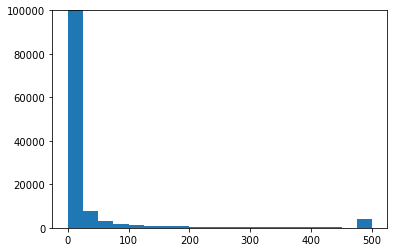

In [29]:
import numpy as np

print(str(dict(sorted(global_dict.items(), key=lambda item: item[1],reverse=True)))[:1000])
print(len(list(global_dict.values())))
values=np.array(list(global_dict.values()))
values[values>500]=500
plt.hist(values,bins=20)
ax = plt.gca()
ax.set_ylim([0, 100000])
plt.show()

In [36]:
global_dict={}

for i,row in tqdm.tqdm(df.iterrows(), total=df.shape[0]):
    for word in row["preprocessed_body"]:
        if not any([w in word for w in filter_words]):
            if word not in global_dict:
                global_dict[word] = {(row['author_id'],row['subreddit_id'])}
            else:
                global_dict[word].add((row['author_id'],row['subreddit_id']))
global_dict = dict(sorted(global_dict.items(), key=lambda item: len(item[1]),reverse=True))



100%|██████████| 625673/625673 [02:34<00:00, 4049.10it/s]


100%|██████████| 316960/316960 [00:05<00:00, 58087.66it/s]


{'wa': {(3684, 221), (16114, 12), (23772, 299), (9180, 43), (25510, 43), (8449, 77), (22836, 127), (24293, 327), (25865, 8), (16771, 267), (450, 3), (19096, 108), (23737, 181), (10942, 57), (21815, 274), (24350, 33), (11244, 321), (4551, 0), (17183, 327), (16505, 190), (4661, 265), (1883, 43), (10584, 12), (15573, 43), (8904, 155), (6576, 7), (25476, 284), (10950, 262), (12839, 172), (24079, 259), (17680, 30), (21749, 316), (13413, 7), (1209, 121), (1721, 165), (20813, 112), (16179, 135), (12364, 12), (4416, 43), (19371, 257), (21548, 284), (563, 308), (11685, 66), (10352, 262), (14917, 233), (971, 43), (22928, 169), (15055, 127), (25521, 159), (9615, 284), (175, 43), (5531, 74), (22412, 260), (2837, 10), (17448, 296), (13949, 151), (17946, 43), (11419, 43), (10393, 245), (2823, 43), (19508, 100), (424, 69), (20315, 284), (15864, 137), (2334, 12), (7805, 326), (7971, 12), (22904, 327), (12865, 172), (21888, 7), (22132, 128), (20495, 43), (21233, 280), (9856, 43), (18539, 212), (17590, 

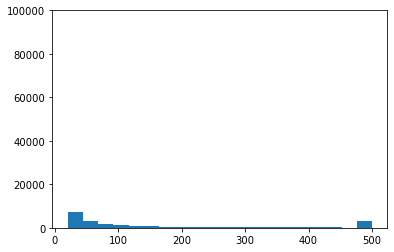

In [37]:
keys=list(global_dict)
for word in tqdm.tqdm(keys):
    if len(set([author_id for (author_id,_) in global_dict[word]]))<20 or len(set([subreddit_id for (_,subreddit_id) in global_dict[word]]))<5:
        global_dict.pop(word)
    
print(str(dict(sorted(global_dict.items(), key=lambda item: len(item[1]),reverse=True)))[:1000])
print(len(list(global_dict.values())))
dict_counts={}
for word in global_dict:
    dict_counts[word]=len(global_dict[word])
values=np.array(list(dict_counts.values()))
values[values>500]=500
plt.hist(values,bins=20)
ax = plt.gca()
ax.set_ylim([0, 100000])
plt.show()